In [426]:
# Importing mandatory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [427]:
df = pd.read_csv("data.csv")
df.shape

(1453, 15)

In [428]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [430]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [431]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## Preprocessing

### Yummy

In [432]:
df['yummy'].unique()

array(['No', 'Yes'], dtype=object)

In [433]:
df['yummy'] = df["yummy"].replace({"No":"0", "Yes":"1"})
df['yummy'] = pd.to_numeric(df['yummy'])

### Convenient

In [434]:
df['convenient'].unique()

array(['Yes', 'No'], dtype=object)

In [435]:
df['convenient'] = df["convenient"].replace({"No":"0", "Yes":"1"})
df['convenient'] = pd.to_numeric(df['convenient'])

### Spicy

In [436]:
df['spicy'].unique()

array(['No', 'Yes'], dtype=object)

In [437]:
df['spicy'] = df["spicy"].replace({"No":"0", "Yes":"1"})
df['spicy'] = pd.to_numeric(df['spicy'])

### Fattening

In [438]:
df['fattening'].unique()

array(['Yes', 'No'], dtype=object)

In [439]:
df['fattening'] = df["fattening"].replace({"No":"0", "Yes":"1"})
df['fattening'] = pd.to_numeric(df['fattening'])

### Greasy

In [440]:
df['greasy'].unique()

array(['No', 'Yes'], dtype=object)

In [441]:
df['greasy'] = df["greasy"].replace({"No":"0", "Yes":"1"})
df['greasy'] = pd.to_numeric(df['greasy'])

### Fast

In [442]:
df['fast'].unique()

array(['Yes', 'No'], dtype=object)

In [443]:
df['fast'] = df["fast"].replace({"No":"0", "Yes":"1"})
df['fast'] = pd.to_numeric(df['fast'])

### Cheap

In [444]:
df['cheap'].unique()

array(['Yes', 'No'], dtype=object)

In [445]:
df['cheap'] = df["cheap"].replace({"No":"0", "Yes":"1"})
df['cheap'] = pd.to_numeric(df['cheap'])

### Tasty

In [446]:
df['tasty'].unique()

array(['No', 'Yes'], dtype=object)

In [447]:
df['tasty'] = df["tasty"].replace({"No":"0", "Yes":"1"})
df['tasty'] = pd.to_numeric(df['tasty'])

### Expensive

In [448]:
df['expensive'].unique()

array(['Yes', 'No'], dtype=object)

In [449]:
df['expensive'] = df["expensive"].replace({"No":"0", "Yes":"1"})
df['expensive'] = pd.to_numeric(df['expensive'])

### Healthy

In [450]:
df['healthy'].unique()

array(['No', 'Yes'], dtype=object)

In [451]:
df['healthy'] = df["healthy"].replace({"No":"0", "Yes":"1"})
df['healthy'] = pd.to_numeric(df['healthy'])

### Disgusting

In [452]:
df['disgusting'].unique()

array(['No', 'Yes'], dtype=object)

In [453]:
df['disgusting'] = df["disgusting"].replace({"No":"0", "Yes":"1"})
df['disgusting'] = pd.to_numeric(df['disgusting'])

### Like

In [454]:
df["Like"].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [455]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Like"] = le.fit_transform(df["Like"])
df['Like'] = pd.to_numeric(df['Like'])

df["Like"].unique()

array([ 6,  1,  0,  3, 10,  9,  5,  2,  8,  7,  4])

### Age

##### Age contains numerical data 

### Visit Frequency

In [456]:
df["VisitFrequency"].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [457]:
df["VisitFrequency"].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [458]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[["VisitFrequency"]]).toarray()

In [459]:
ohe.categories_

[array(['Every three months', 'More than once a week', 'Never',
        'Once a month', 'Once a week', 'Once a year'], dtype=object)]

In [460]:
feature_labels = np.array(ohe.categories_).ravel()

In [461]:
features = pd.DataFrame(feature_array, columns=feature_labels)
features

,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1448,0.0,0.0,0.0,0.0,0.0,1.0
1449,0.0,0.0,0.0,0.0,1.0,0.0
1450,0.0,0.0,0.0,1.0,0.0,0.0
1451,1.0,0.0,0.0,0.0,0.0,0.0


In [462]:
df_new = pd.concat([df, features], axis=1)
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,VisitFrequency,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,0,1,0,1,0,1,1,0,1,0,...,6,61,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,...,1,51,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,...,0,62,Every three months,Female,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,...,3,69,Once a week,Female,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,1,1,1,0,0,1,...,1,49,Once a month,Male,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,9,47,Once a year,Male,0.0,0.0,0.0,0.0,0.0,1.0
1449,1,1,0,1,0,0,1,1,0,1,...,1,36,Once a week,Female,0.0,0.0,0.0,0.0,1.0,0.0
1450,1,1,0,1,0,1,0,1,1,0,...,2,52,Once a month,Female,0.0,0.0,0.0,1.0,0.0,0.0
1451,1,1,0,0,0,1,1,1,0,1,...,3,41,Every three months,Male,1.0,0.0,0.0,0.0,0.0,0.0


In [463]:
df1 = df_new.drop(["VisitFrequency"], axis=1)

### Gender

In [464]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [465]:
df1['Gender'] = df1["Gender"].replace({"Male":"0", "Female":"1"})
df1['Gender'] = pd.to_numeric(df1['Gender'])

### View Datatypes

In [466]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,0,1,0,1,0,1,1,0,1,0,0,6,61,1,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,1,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,1,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,1,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,0,0.0,0.0,0.0,1.0,0.0,0.0


In [467]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yummy                  1453 non-null   int64  
 1   convenient             1453 non-null   int64  
 2   spicy                  1453 non-null   int64  
 3   fattening              1453 non-null   int64  
 4   greasy                 1453 non-null   int64  
 5   fast                   1453 non-null   int64  
 6   cheap                  1453 non-null   int64  
 7   tasty                  1453 non-null   int64  
 8   expensive              1453 non-null   int64  
 9   healthy                1453 non-null   int64  
 10  disgusting             1453 non-null   int64  
 11  Like                   1453 non-null   int32  
 12  Age                    1453 non-null   int64  
 13  Gender                 1453 non-null   int64  
 14  Every three months     1453 non-null   float64
 15  More

## Exploratory Data Analysis

### Yummy

Text(0.5, 1.0, 'Yummy Review')

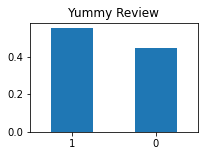

In [468]:
df1['yummy'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Yummy Review")

### Convenient

Text(0.5, 1.0, 'Convenient Review')

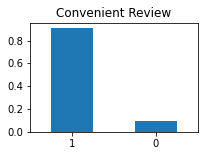

In [469]:
df1['convenient'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Convenient Review")

### Spicy

Text(0.5, 1.0, 'Spicy Review')

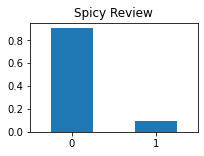

In [470]:
df1['spicy'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Spicy Review")

### Fattening

Text(0.5, 1.0, 'Fattening Review')

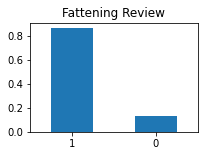

In [471]:
df1['fattening'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Fattening Review")

### Greasy

Text(0.5, 1.0, 'Greasy Review')

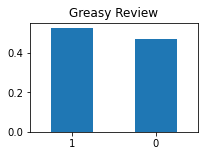

In [472]:
df1['greasy'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Greasy Review")

### Fast

Text(0.5, 1.0, 'Delivery Speed Review')

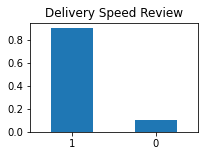

In [473]:
df1['fast'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Delivery Speed Review")

### Cheap

Text(0.5, 1.0, 'Cheap Review')

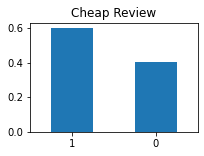

In [474]:
df1['cheap'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Cheap Review")

### Tasty

Text(0.5, 1.0, 'Taste Review')

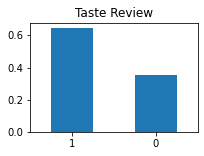

In [475]:
df1['tasty'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Taste Review")

### Expensive

Text(0.5, 1.0, 'Cost Review')

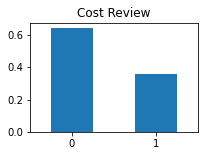

In [476]:
df1['expensive'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Cost Review")

### Healthy

Text(0.5, 1.0, 'Health concerned Review')

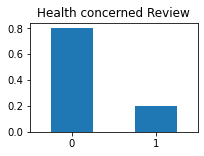

In [477]:
df1['healthy'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Health concerned Review")

### Like

Text(0.5, 1.0, 'Liking Review')

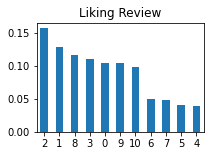

In [478]:
df['Like'] = df["Like"].replace({"I love it!+5":"+5", "I hate it!-5":"-5"})
df['Like'].value_counts()

df['Like'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Liking Review")

### Age

In [479]:
df1['Age'].describe()

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age-wise analysis')

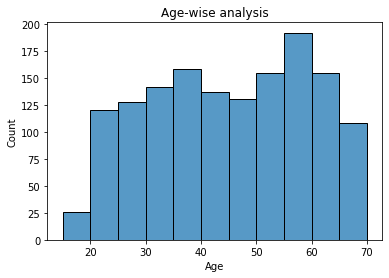

In [480]:
sb.histplot(data = df1, x = "Age", bins = list(range(15,75,5)))
plt.title("Age-wise analysis")

### Visit Frequency

Text(0.5, 1.0, 'Frequency of visiting [proportion]')

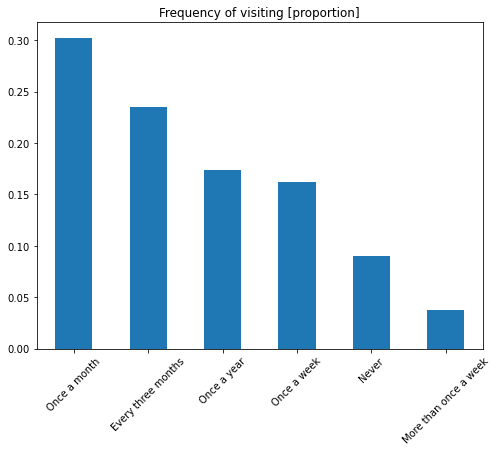

In [481]:
df['VisitFrequency'].value_counts(normalize=True).plot.bar(figsize=(8,6))
plt.xticks(rotation = 45)
plt.title("Frequency of visiting [proportion]")

### Gender

Text(0.5, 1.0, 'Gender-wise analysis')

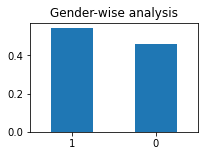

In [482]:
df1['Gender'].value_counts(normalize=True).plot.bar(figsize=(3,2))
plt.xticks(rotation = 0)
plt.title("Gender-wise analysis")

### As per the univarient EDA, We can conclude that food is convenient, not more spicy, fattening and fast for almost all customers. 

## Principal Component Analysis

In [483]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_data = sc.fit_transform(df1)
scaled_data = pd.DataFrame(sc_data, columns = df1.columns)
scaled_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,0.395759,1.153258,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,-1.055624,0.449839,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,-1.345901,1.223600,0.918645,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,-0.475071,1.715993,0.918645,-0.554825,-0.196466,-0.314789,-0.657981,2.276616,-0.458067
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,-1.055624,0.309156,-1.088560,-0.554825,-0.196466,-0.314789,1.519801,-0.439248,-0.458067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261,1.266589,0.168472,-1.088560,-0.554825,-0.196466,-0.314789,-0.657981,-0.439248,2.183088
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488,-1.055624,-0.605289,0.918645,-0.554825,-0.196466,-0.314789,-0.657981,2.276616,-0.458067
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488,-0.765348,0.520181,0.918645,-0.554825,-0.196466,-0.314789,1.519801,-0.439248,-0.458067
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488,-0.475071,-0.253579,-1.088560,1.802370,-0.196466,-0.314789,-0.657981,-0.439248,-0.458067


In [484]:
from sklearn.preprocessing import normalize

norm_data = normalize(sc_data)
normed_data = pd.DataFrame(norm_data, columns = df1.columns)

norm_data

array([[-0.29482456,  0.0845459 , -0.08523915, ..., -0.17453232,
        -0.11651259, -0.12150421],
       [ 0.2581547 ,  0.09145577, -0.09220568, ..., -0.1887967 ,
        -0.12603507, -0.13143466],
       [-0.20730582,  0.05944843,  0.58040859, ..., -0.12272235,
        -0.0819258 , -0.08543566],
       ...,
       [ 0.26351894,  0.09335615, -0.09412164, ...,  0.44514311,
        -0.12865398, -0.13416576],
       [ 0.19827202,  0.0702413 , -0.07081726, ..., -0.14500261,
        -0.09679943, -0.10094651],
       [-0.21553163,  0.06180732, -0.06231412, ..., -0.12759193,
        -0.08517658, -0.08882571]])

In [485]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_principal1 = pca.fit_transform(norm_data)

x_principal = pd.DataFrame(x_principal1)
x_principal.columns = ['P1', 'P2']
x_principal.head()

,P1,P2
0,0.360644,-0.275258
1,-0.164352,0.035751
2,0.100859,0.096559
3,-0.053014,-0.234040
4,-0.073503,-0.151901


## K-Means

In [486]:
from sklearn.cluster import KMeans

In [487]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    km = KMeans(n_clusters = n, init = 'k-means++').fit(x_principal)
    clusters_inertia.append(km.inertia_)
    silhouette_avg = silhouette_score(x_principal, km.labels_)
    s_scores.append(silhouette_avg)

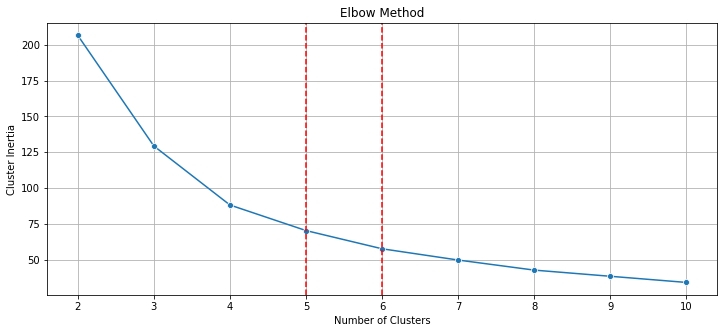

In [488]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sb.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Cluster Inertia")
ax.axvline(5, ls = "--", c = "red")
ax.axvline(6, ls = "--", c = "red")
plt.grid()
plt.show()

#### Silhoutte score method indicates the best options would be respectively 5  or 6 clustres.
#### Let's compare both
### 5 clusters

In [489]:
km_5 = KMeans(n_clusters = 5, init = 'k-means++').fit(x_principal)

km_clustered = df1.copy()
km_clustered.loc[:,'Cluster'] = km_5.labels_

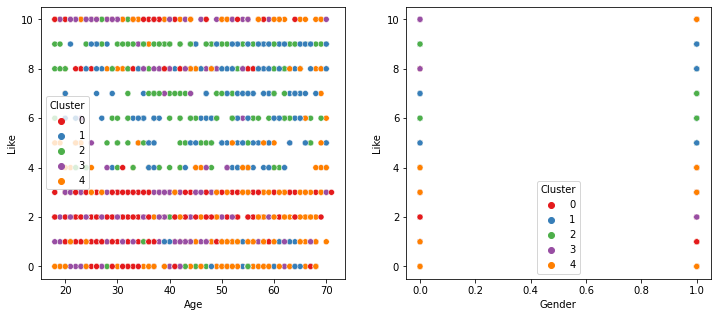

In [490]:
fig, (axes) = plt.subplots(1, 2, figsize = (12,5))
scat_1 = sb.scatterplot('Age', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[0], palette = 'Set1', legend = 'full')
scat_2 = sb.scatterplot('Gender', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[1], palette = 'Set1', legend = 'full')
#axes[0].scatter(km_clustered.cluster_centers_[:,11], km_clustered.cluster_centers_[:,12], marker = 's', s = 40, c = 'blue')
#axes[1].scatter(km_clustered.cluster_centers_[:,11], km_clustered.cluster_centers_[:,14], marker = 's', s = 40, c = 'blue')
plt.show()

### 6 Clusters

In [501]:
km_6 = KMeans(n_clusters = 6, init = 'k-means++').fit(x_principal)

km_clustered = df1.copy()
km_clustered.loc[:,'Cluster'] = km_6.labels_

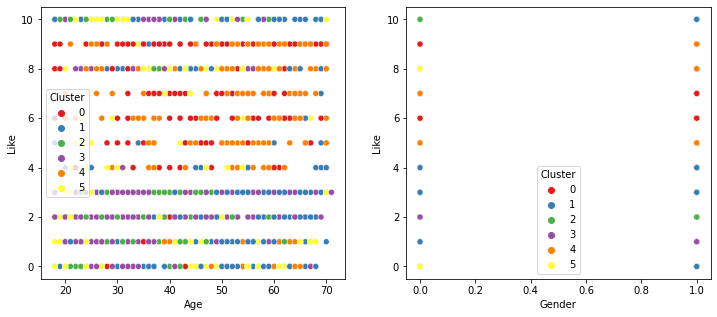

In [503]:
fig, (axes) = plt.subplots(1, 2, figsize = (12,5))
scat_1 = sb.scatterplot('Age', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[0], palette = 'Set1', legend = 'full')
scat_2 = sb.scatterplot('Gender', 'Like', data = km_clustered, hue = 'Cluster', ax = axes[1], palette = 'Set1', legend = 'full')
#axes[0].scatter(km_clustered.cluster_centers_[:,11], km_clustered.cluster_centers_[:,12], marker = 's', s = 40, c = 'blue')
#axes[1].scatter(km_clustered.cluster_centers_[:,11], km_clustered.cluster_centers_[:,14], marker = 's', s = 40, c = 'blue')
plt.show()

### I have also tried DBSCAN, but due to unequal param it getting, not giving perfect analysis

## DBSCAN

In [493]:
from sklearn.cluster import DBSCAN

In [494]:
from itertools import product

eps_values = np.arange(8, 12.75, 0.25) #eps values to be investigated
min_samples = np.arange(3, 10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [495]:
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(x_principal)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(x_principal,DBS_clustering.labels_))